In [255]:
import pandas as pd
import numpy as np

In [257]:

from sklearn.metrics import classification_report
from tensorflow import keras

In [187]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [188]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [189]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [190]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [191]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [192]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [193]:
df.Surname.value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [194]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

We dont require Row number, customer ID and Surname because they are many values present in the columns and are not helpful in prediction because they wont have that much effect on the target variable

In [195]:
df.drop(['RowNumber','CustomerId', 'Surname'], axis='columns', inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [198]:
Churn_1 = df[df.Exited==1].Gender
Churn_1.value_counts()

Female    1139
Male       898
Name: Gender, dtype: int64

In [199]:
Churn_0 = df[df.Exited==0].Gender
Churn_0.value_counts()

Male      4559
Female    3404
Name: Gender, dtype: int64

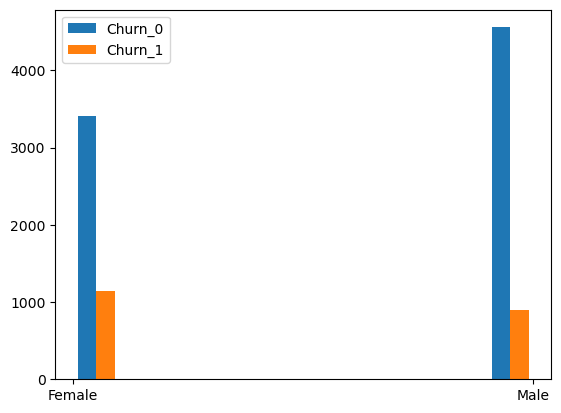

In [200]:
plt.hist([Churn_0,Churn_1], label=['Churn_0', 'Churn_1'])
plt.legend()
plt.show()

In [201]:
Geog_Churn_1 = df[df.Exited==1].Geography
Geog_Churn_1.value_counts()

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

In [202]:
Geog_Churn_0 = df[df.Exited==0].Geography
Geog_Churn_0.value_counts()

France     4204
Spain      2064
Germany    1695
Name: Geography, dtype: int64

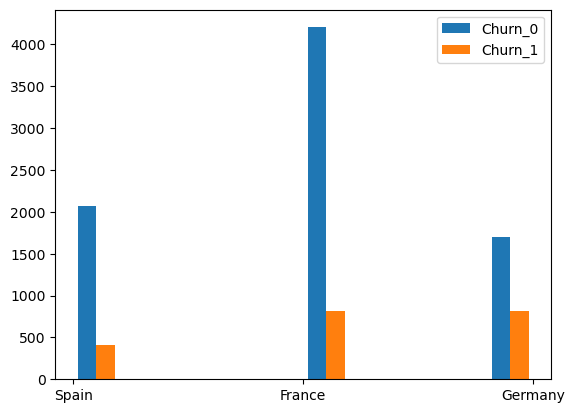

In [203]:
plt.hist([Geog_Churn_0,Geog_Churn_1], label=['Churn_0','Churn_1'])
plt.legend()
plt.show()

In [204]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [205]:
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [206]:
df = pd.get_dummies(data=df, columns=['Geography'])

In [207]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [208]:
df.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [209]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()

In [210]:
scale = ['CreditScore','Balance','EstimatedSalary']

In [211]:
df[scale] = MinMax.fit_transform(df[scale])
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,42,2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,0,41,1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,0,42,8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,0,39,1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,0,43,2,0.500246,1,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,39,5,0.000000,2,1,0,0.481341,0,1,0,0
9996,0.332,1,35,10,0.228657,1,1,1,0.508490,0,1,0,0
9997,0.718,0,36,7,0.000000,1,0,1,0.210390,1,1,0,0
9998,0.844,1,42,3,0.299226,2,1,0,0.464429,1,0,1,0


In [212]:
df.Tenure.max()

10

In [213]:
df.Age.max()

92

In [214]:
from sklearn.preprocessing import StandardScaler

In [215]:
sca = StandardScaler()

In [216]:
df['Age'] = df['Age']/100

In [217]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.42,2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,0,0.41,1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,0,0.42,8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,0,0.39,1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,0,0.43,2,0.500246,1,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.39,5,0.000000,2,1,0,0.481341,0,1,0,0
9996,0.332,1,0.35,10,0.228657,1,1,1,0.508490,0,1,0,0
9997,0.718,0,0.36,7,0.000000,1,0,1,0.210390,1,1,0,0
9998,0.844,1,0.42,3,0.299226,2,1,0,0.464429,1,0,1,0


In [218]:
features = df.drop('Exited', axis=1)
target = df['Exited']

In [219]:
features

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.42,2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,0,0.41,1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,0,0.42,8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,0,0.39,1,0.000000,2,0,0,0.469120,1,0,0
4,1.000,0,0.43,2,0.500246,1,1,1,0.395400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.39,5,0.000000,2,1,0,0.481341,1,0,0
9996,0.332,1,0.35,10,0.228657,1,1,1,0.508490,1,0,0
9997,0.718,0,0.36,7,0.000000,1,0,1,0.210390,1,0,0
9998,0.844,1,0.42,3,0.299226,2,1,0,0.464429,0,1,0


In [220]:
target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [221]:
from imblearn.over_sampling import SMOTE

In [222]:
smte = SMOTE(sampling_strategy='minority')

In [224]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [226]:
features_smt, target_smt = smte.fit_resample(features,target)

In [227]:
features_smt

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538000,0,0.420000,2,0.000000,1,1,1,0.506735,1,0,0
1,0.516000,0,0.410000,1,0.334031,1,0,1,0.562709,0,0,1
2,0.304000,0,0.420000,8,0.636357,3,1,0,0.569654,1,0,0
3,0.698000,0,0.390000,1,0.000000,2,0,0,0.469120,1,0,0
4,1.000000,0,0.430000,2,0.500246,1,1,1,0.395400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15921,0.215698,1,0.507285,6,0.148305,1,0,0,0.381247,0,0,1
15922,0.399890,0,0.438589,3,0.477566,1,0,0,0.690700,0,1,0
15923,0.582269,1,0.500000,2,0.462552,1,1,0,0.161734,0,1,0
15924,0.700651,1,0.601524,7,0.000000,1,1,0,0.440389,0,0,1


In [228]:
features

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.42,2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,0,0.41,1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,0,0.42,8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,0,0.39,1,0.000000,2,0,0,0.469120,1,0,0
4,1.000,0,0.43,2,0.500246,1,1,1,0.395400,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.39,5,0.000000,2,1,0,0.481341,1,0,0
9996,0.332,1,0.35,10,0.228657,1,1,1,0.508490,1,0,0
9997,0.718,0,0.36,7,0.000000,1,0,1,0.210390,1,0,0
9998,0.844,1,0.42,3,0.299226,2,1,0,0.464429,0,1,0


In [229]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [230]:
target_smt.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [244]:
len(features.columns)

12

In [245]:
len(features_smt.columns)

12

In [246]:
def BankChurn(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=12, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=5, stratify=target)

In [249]:
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(features_smt, target_smt, test_size=0.2, random_state=5, stratify=target_smt)

In [250]:
y_train_smt.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [251]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [252]:
y_test_smt.value_counts()

1    1593
0    1593
Name: Exited, dtype: int64

In [253]:
y_test.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

In [258]:
ypred = BankChurn(X_train, y_train, X_test, y_test,'binary_crossentropy', -1)

Epoch 1/100
250/250 [==============================] - 3s 4ms/step - loss: 0.5140 - accuracy: 0.7671
Epoch 2/100
250/250 [==============================] - 3s 10ms/step - loss: 0.4676 - accuracy: 0.7974
Epoch 3/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4545 - accuracy: 0.8015
Epoch 4/100
250/250 [==============================] - 3s 11ms/step - loss: 0.4369 - accuracy: 0.8092
Epoch 5/100
250/250 [==============================] - 3s 13ms/step - loss: 0.4194 - accuracy: 0.8186
Epoch 6/100
250/250 [==============================] - 2s 9ms/step - loss: 0.4054 - accuracy: 0.8263
Epoch 7/100
250/250 [==============================] - 2s 8ms/step - loss: 0.3932 - accuracy: 0.8310
Epoch 8/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3866 - accuracy: 0.8359
Epoch 9/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3823 - accuracy: 0.8389
Epoch 10/100
250/250 [==============================] - 2s 9ms/step - loss: 0.3775 - acc

250/250 [==============================] - 1s 4ms/step - loss: 0.3350 - accuracy: 0.8629
Epoch 82/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3332 - accuracy: 0.8626
Epoch 83/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3338 - accuracy: 0.8640
Epoch 84/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3333 - accuracy: 0.8624
Epoch 85/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3333 - accuracy: 0.8624
Epoch 86/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3332 - accuracy: 0.8634
Epoch 87/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3329 - accuracy: 0.8624
Epoch 88/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3339 - accuracy: 0.8645
Epoch 89/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3319 - accuracy: 0.8633
Epoch 90/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3326 - accuracy: 

In [259]:
print([ypred])

[array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)]


In [260]:
ypred_smt = BankChurn(X_train_smt, y_train_smt, X_test_smt, y_test_smt,'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 6s 7ms/step - loss: 0.6598 - accuracy: 0.6179
Epoch 2/100
399/399 [==============================] - 3s 7ms/step - loss: 0.6004 - accuracy: 0.6810
Epoch 3/100
399/399 [==============================] - 2s 6ms/step - loss: 0.5708 - accuracy: 0.7084
Epoch 4/100
399/399 [==============================] - 3s 8ms/step - loss: 0.5436 - accuracy: 0.7266
Epoch 5/100
399/399 [==============================] - 2s 6ms/step - loss: 0.5157 - accuracy: 0.7494
Epoch 6/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4944 - accuracy: 0.7650
Epoch 7/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4837 - accuracy: 0.7648
Epoch 8/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4755 - accuracy: 0.7696
Epoch 9/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4712 - accuracy: 0.7746
Epoch 10/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4679 - accura

399/399 [==============================] - 2s 5ms/step - loss: 0.4041 - accuracy: 0.8105
Epoch 82/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4026 - accuracy: 0.8125
Epoch 83/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4018 - accuracy: 0.8130
Epoch 84/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4040 - accuracy: 0.8108
Epoch 85/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4016 - accuracy: 0.8148
Epoch 86/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4002 - accuracy: 0.8140
Epoch 87/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4018 - accuracy: 0.8121
Epoch 88/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4000 - accuracy: 0.8177
Epoch 89/100
399/399 [==============================] - 2s 5ms/step - loss: 0.3998 - accuracy: 0.8144
Epoch 90/100
399/399 [==============================] - 2s 5ms/step - loss: 0.3995 - accuracy: 

In [261]:
print([ypred_smt])

[array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)]


The Accuracy of normal model maybe better than smote dataset but smote predicts both classes with best accuracy but normal dataset fails in of the class because of imbalance in dataset. Due to this reason we choose smote for balancing the data

In [262]:
from sklearn.metrics import confusion_matrix

In [264]:
cm = confusion_matrix(y_test, ypred)

<AxesSubplot:>

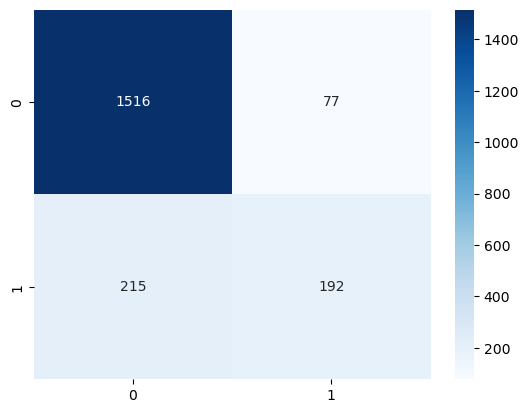

In [269]:
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')

In [267]:
cm_smt = confusion_matrix(y_test_smt, ypred_smt)

<AxesSubplot:>

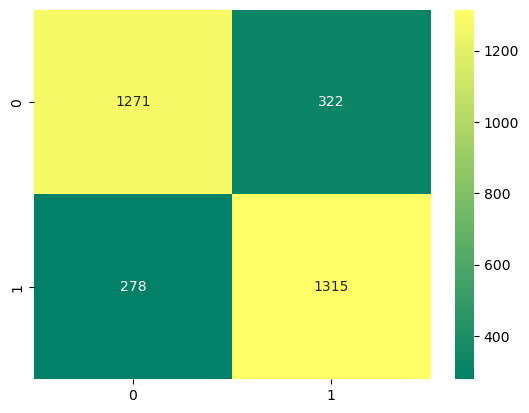

In [270]:
sns.heatmap(cm_smt, annot=True, fmt="d",cmap='summer')